In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import kaggle
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Add,Dense,Dropout,Activation,BatchNormalization,Conv2D,Flatten,MaxPool2D,UpSampling2D,Reshape
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

In [3]:
api=kaggle.api
api.authenticate()
api.dataset_download_files('furryroad/mnist-balanced-dataset',unzip=True)

In [0]:
noise_factor=0.5
X_train=pd.read_csv('train_X_data.csv').to_numpy()/255 # loaded converted to numpy and normalized
X_train_noisy=X_train+ noise_factor*np.random.rand(X_train.shape[0],X_train.shape[1])

In [0]:
X_test=pd.read_csv('test_X_data.csv').to_numpy()/255 # loaded converted to numpy and normalized
X_test_noisy=X_test+ noise_factor*np.random.rand(X_test.shape[0],X_test.shape[1])

Plain Image

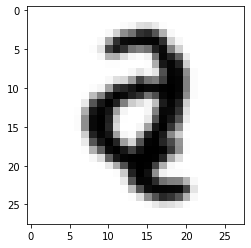

In [6]:
plt.imshow(X_train[0].reshape((28,28)).T,cmap='gray_r')

Noisy Image

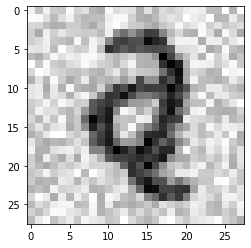

In [9]:
plt.imshow(X_train_noisy[0].reshape((28,28)).T,cmap='gray_r')

In [0]:
X_train=np.moveaxis(X_train.reshape(-1,28,28,1),1,2)
X_train_noisy=np.moveaxis(X_train_noisy.reshape(-1,28,28,1),1,2)
X_test=np.moveaxis(X_test.reshape(-1,28,28,1),1,2)
X_test_noisy=np.moveaxis(X_test_noisy.reshape(-1,28,28,1),1,2)

# AutoEncoder Model


Convolutional Autoencoder are models that use semi supervised learnoing to reduce the noisy in an image.
They are extremely help in OCR application as photos taken are often noisy.
Below is an example of Convolutional autoencoder that has 6 layers and reduced the noise in the image quite efficiently.

In [0]:
model=Sequential()
#Encoding
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(strides=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(strides=(2,2)))
model.add(Flatten())
#Decoding
model.add(Dense(units=7*7*64,activation='relu'))
model.add(Reshape((7,7,64)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(1,kernel_size=(3,3),activation='sigmoid',padding='same'))


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [18]:
model.fit(X_train_noisy,X_train,epochs=1)

3525/3525 [==============================] - 724s 205ms/step - loss: 0.1276


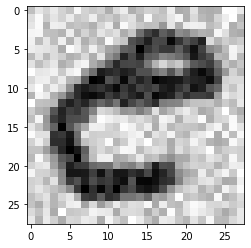

In [20]:
plt.imshow(X_test_noisy[0].reshape(28,28),cmap='gray_r')

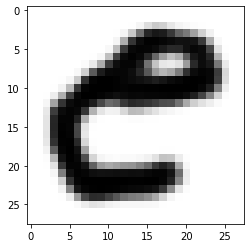

In [19]:
plt.imshow(model.predict(X_test_noisy[0].reshape(-1,28,28,1)).reshape(28,28),cmap='gray_r')

In [0]:
model.save('auto-encoder.h5')

Now lets change the noise factor and try our auto encoder model

In [0]:
X_test_noisy=X_test + 0.7*np.random.rand(*X_test.shape)

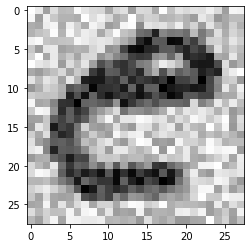

In [25]:
plt.imshow(X_test_noisy[0].reshape(28,28),cmap='gray_r')

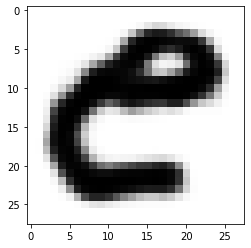

In [26]:
plt.imshow(model.predict(X_test_noisy[0].reshape(-1,28,28,1)).reshape(28,28),cmap='gray_r')

As we can see it can still reduce the noise very efficiently 